Terms we can use to describe Indian Food are Spicy, rich, flavourful and diverse.Below are some basic analysis and visualization based on Indian food which shows flavor profile and diet by region.Also the most commonly used ingredients in the Indian cuisine.
**
# Table of Contents
* [Data exploration](#section-Intro)
* [Number of Dishes by Region and kind of diet](#section-one)
* [Number of Dishes by Region and kind of flavorprofile](#section-two)
* [Ingredients most commonly used in Indian dishes](#section-three)
* [Top 5 dishes with highest number of ingredients and their total cooking Time](#section-four)
* [Proportion of Flavor profile in Indian Dishes](#section-five)
* [Proportion of Diet in Indian Dishes](#section-six)
* [Count of Dishes in every meal course](#section-seven)
* [Count of Dishes by State](#section-eight)






<a id="section-Intro"></a>
# Data Exploartion and analysis

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import nltk
import numpy as np
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud


#import the Data
df=pd.read_csv("../input/indian-food-101/indian_food.csv")
df.ingredients=df.ingredients.str.lower()

#The Dishes with -1 Flavor Profile has been identified and flavor profile field has been updated based on some
#vague knowledge on the ingredients flavor and taste

df.loc[(df['flavor_profile']=="-1") & ((df['ingredients'].str.contains("masala"))| (df['ingredients'].str.contains("curry leaves"))|(df['ingredients'].str.contains("chili"))|(df['ingredients'].str.contains("chilli"))|(df['ingredients'].str.contains("garlic"))|(df['ingredients'].str.contains("onion"))),'flavor_profile']\
='spicy'
df.loc[(df['flavor_profile']=="-1") & (df['ingredients'].str.contains("flour"))& (df['course']!=("dessert")),'flavor_profile']\
='bland'

df.loc[((df['flavor_profile']=="-1") & ((df['ingredients'].str.contains("rice"))|(df['ingredients'].str.contains("maida"))| (df['ingredients'].str.contains("flour")))&((~df['ingredients'].str.contains("curry leaves"))|(~df['ingredients'].str.contains("chili"))|(~df['ingredients'].str.contains("garlic"))|(~df['ingredients'].str.contains("onion")))),'flavor_profile']\
='spicy'

df=df.replace("-1",np.nan)
df=df.replace(-1,np.nan)
df['ingredientscount']=df['ingredients'].str.count(',').add(1)
df['TotalCookTime']=df['prep_time']+df['cook_time']
df.groupby('course').agg({'TotalCookTime':['min','mean','max']})



TotalCookTime                   
                      min        mean    max
course                                      
dessert              10.0   76.974026  730.0
main course          20.0   64.954545  620.0
snack                10.0   88.000000  450.0
starter             165.0  217.500000  270.0

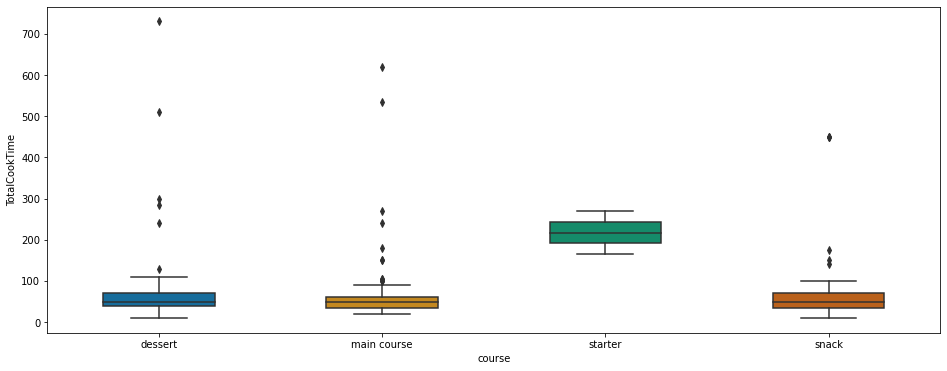

In [2]:
plt.figure(figsize=(16, 6))
bplot = sns.boxplot(y='TotalCookTime', x='course', 
                 data=df, 
                 width=0.5,
                 palette="colorblind")

<a id="section-one"></a>
# Number of Dishes by Region and kind of diet

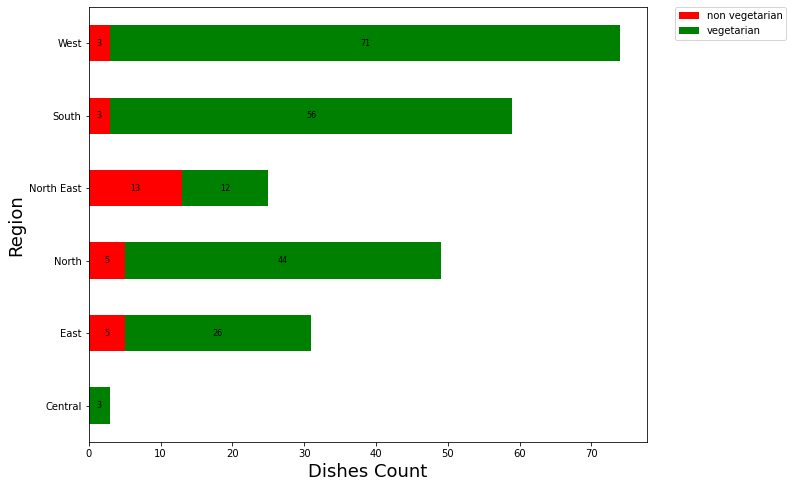

In [3]:

#Number of Dishes by region and further classification based on kind of diet

#Based on Diet the Dishes has been classified under the region 
RegionalDiet=df.groupby(['region','diet'])['name'].count().unstack('diet')
dfRegionalDiet=pd.concat([RegionalDiet],axis=1)

#Stacked Bar graph
ax = dfRegionalDiet.plot.barh(stacked=True, figsize=(10, 8),color='rg')
for i,rect in enumerate(ax.patches):
    # Find where everything is located
    height = rect.get_height()
    width = int(rect.get_width())
    
    x = rect.get_x()

    y = rect.get_y()
 
    
    # The height of the bar is the data value and can be used as the label
    label_text = width  # f'{width:.2f}' to format decimal values
    
    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2
    
    # only plot labels greater than given width
  

    if width > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=8)
      
# move the legend
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# add labels
ax.set_ylabel("Region", fontsize=18)
ax.set_xlabel("Dishes Count", fontsize=18)
plt.show()


<a id="section-two"></a>
# Number of Dishes by Region and kind of Flavor Profile

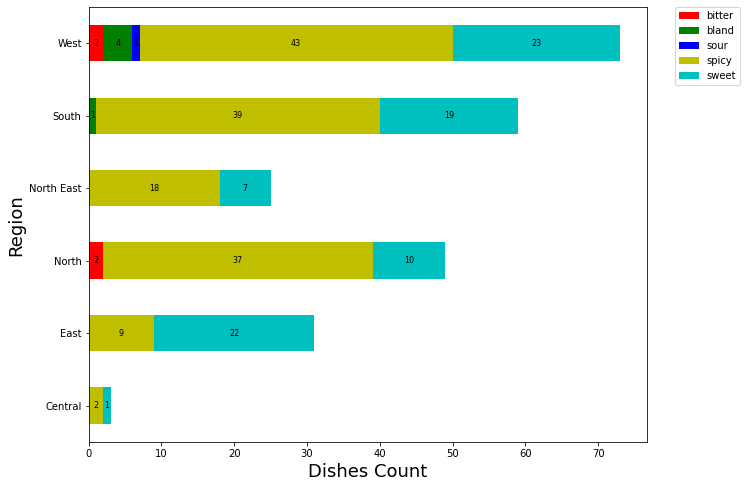

In [4]:


FlavorProfile=df.groupby(['region','flavor_profile'])['name'].count().unstack('flavor_profile')
dfFlavorProfile=pd.concat([FlavorProfile],axis=1)

ax = dfFlavorProfile.plot.barh(stacked=True, figsize=(10, 8),color='rgbycm')
for i,rect in enumerate(ax.patches):
    # Find where everything is located
    height = rect.get_height()
    width = int(rect.get_width())
    
    x = rect.get_x()

    y = rect.get_y()
 
    
    # The height of the bar is the data value and can be used as the label
    label_text = width  # f'{width:.2f}' to format decimal values
    
    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2
    
    # only plot labels greater than given width
  

    if width > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=8)
      
# move the legend
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# add labels
ax.set_ylabel("Region", fontsize=18)
ax.set_xlabel("Dishes Count", fontsize=18)
plt.show()



 <a id="section-three"></a>
# Ingredients most commonly used in Indian dishes

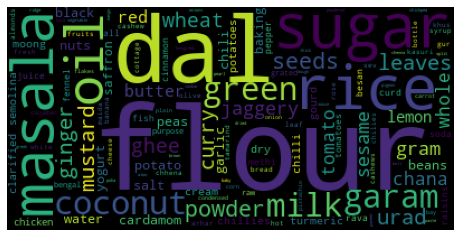

In [5]:

df=pd.read_csv("../input/indian-food-101/indian_food.csv")
all_ingredients= []
for i in range(len(df)):
    txt =  df['ingredients'][i]
    #txt =  txt.replace(', ', ',').lower()
    #all_words += [ word for word in re.split('[,.]',txt) ]
    all_ingredients += [word.lower() for word in nltk.word_tokenize(txt) if not word in ['.', ',']]
    
word_freq = Counter(all_ingredients)

W = WordCloud().fit_words(word_freq)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(W)
plt.axis('off')
plt.show()



 <a id="section-four"></a>
# Top 5 Dishes with higest number of ingrdients and their total cooking Time

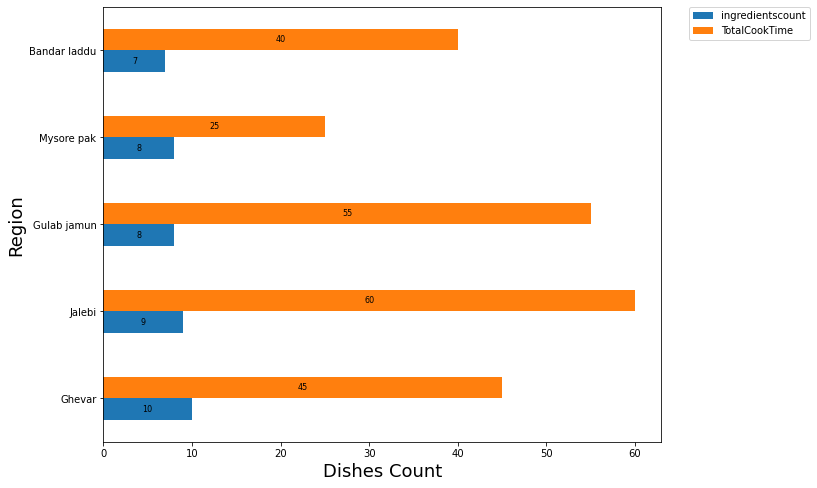

In [6]:
df=df.replace("-1",np.nan)
df=df.replace(-1,np.nan)
df['ingredientscount']=df['ingredients'].str.count(',').add(1)
df['TotalCookTime']=df['prep_time']+df['cook_time']

df.sort_values(by=['ingredientscount'],ascending=False,inplace=True)
dfnew=df[['name','ingredientscount','TotalCookTime']].head(5)

dfnew.set_index('name',inplace=True)
ax = dfnew.plot.barh(figsize=(10,8))

for i,rect in enumerate(ax.patches):
    # Find where everything is located
    height = rect.get_height()
    width = int(rect.get_width())
    
    x = rect.get_x()

    y = rect.get_y()
 
    
    # The height of the bar is the data value and can be used as the label
    label_text = width  # f'{width:.2f}' to format decimal values
    
    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2
    
    # only plot labels greater than given width
  

    if width > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=8)
      
# move the legend
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# add labels
ax.set_ylabel("Region", fontsize=18)
ax.set_xlabel("Dishes Count", fontsize=18)
plt.show()


<a id="section-five"></a>
# Proportion of Flavor Profile in Indian Dishes

In [7]:

df_FlavorProfileProp=df.groupby(['flavor_profile'])['name'].count().reset_index()
df_FlavorProfileProp.columns = ['FlavorProfile','count']
fig = px.pie(df_FlavorProfileProp, values='count', names='FlavorProfile', title='Proportion of Flavor Profile among dishes',color_discrete_sequence=['green', 'red','purple','yellow','orange','maroon'])
          
fig.show()






<a id="section-six"></a>
# Proportion of Diets in Indian Dishes

In [8]:

df_DietProp=df.groupby(['diet'])['name'].count().reset_index()
df_DietProp.columns = ['diet','count']
fig = px.pie(df_DietProp, values='count', names='diet', title='Proportion of Vegetarian and Non-Vegetarian dishes',color_discrete_sequence=['green', 'red'])
          
fig.show()



In [9]:
df_courseProp=df.groupby(['course'])['name'].count().reset_index()
df_courseProp.columns = ['course','count']
fig = px.pie(df_courseProp, values='count', names='course', title='Proportion of meal course among dishes')
          
fig.show()

<a id="section-eight"></a>
# Count of Dishes by State

In [10]:
df_stateDishcount=df.groupby('state')['name'].count().reset_index()
df_stateDishcount.columns=['state','count']
fig = px.choropleth(
    df_stateDishcount,
    geojson="https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson",
    featureidkey='properties.ST_NM',
    locations='state',
    color='count',
    color_continuous_scale='Reds'
)

fig.update_geos(fitbounds="locations", visible=False)

fig.show()